## Problem Definition

> Analyze the physicochemical data of wines and determine which specific features play a significant role in determining the quality of wine. 

## Features 

### Data Dictionary

1. Fixed Acidity: It refers to the total concentration of acids in the wine, primarily tartaric, malic, and sometimes citric acids. Fixed acidity contributes to the overall tartness or sourness of the wine.

2. Volatile Acidity: It represents the presence of volatile acids, mainly acetic acid, in the wine. In small quantities, it can add complexity to the wine, but high levels can result in an unpleasant vinegar-like aroma and taste.

3. Citric Acid: This is a specific type of acid found in wine, derived from citrus fruits. It can contribute to the overall acidity and freshness of the wine.

4. Residual Sugar: It refers to the amount of sugar remaining in the wine after fermentation. Wines can range from bone-dry (very low residual sugar) to sweet (higher residual sugar). Residual sugar affects the perceived sweetness of the wine.

5. Chlorides: Chlorides represent the concentration of salt in the wine. In excess, they can lead to a salty or briny taste. However, in moderation, they can contribute to the wine's complexity.

6. Free Sulfur Dioxide: Sulfur dioxide is commonly used as a preservative in winemaking. Free sulfur dioxide refers to the amount of sulfur dioxide that is not bound to other wine components. It helps prevent the growth of undesirable microorganisms and oxidation.

7. Total Sulfur Dioxide: This measurement represents the total amount of sulfur dioxide in the wine, including both free and bound forms. It is an important parameter for assessing the wine's stability and preservation.

8. Density: Density refers to the mass of the wine per unit volume. It can provide information about the sugar content or the presence of certain substances in the wine.

9. pH: pH measures the acidity or basicity of the wine on a scale from 0 to 14. A pH below 7 indicates acidity, while a pH above 7 indicates alkalinity. pH influences the wine's overall balance and can affect its aging potential.

10. Sulphates (Sulfates): Sulphates are chemical compounds that include sulfur and oxygen. In wine, they often come from sulfur dioxide usage. Sulphates can act as antioxidants and contribute to the wine's stability and freshness.

11. Alcohol: Alcohol content in wine is typically expressed as a percentage of volume. It is a product of fermentation, where yeast converts sugar into alcohol. Alcohol affects the wine's body, texture, and perceived warmth or heat. 

12. Quality: Each expert graded the wine quality between 0 (very bad) and 10 (very excellent)(score between 0 and 10)

# Imporitng Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading csv file in pandas dataframe

In [93]:
red_wine = pd.read_csv('winequality-red.csv')

In [94]:
red_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [5]:
white_wine = pd.read_csv('winequality-white.csv')

In [6]:
white_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


#### The values in the dataset are not separated by commas; instead, they are separated by semicolons. Therefore, when reading the CSV file, we need to utilize the delimiter parameter and specify the semicolon (' ; ') as the delimiter for proper parsing of the data

In [95]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

In [96]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

In [88]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Exploration(Exploratory Data Analysis or EDA)

In [16]:
print(red_wine.shape)
print(white_wine.shape)

(1599, 12)
(4898, 12)


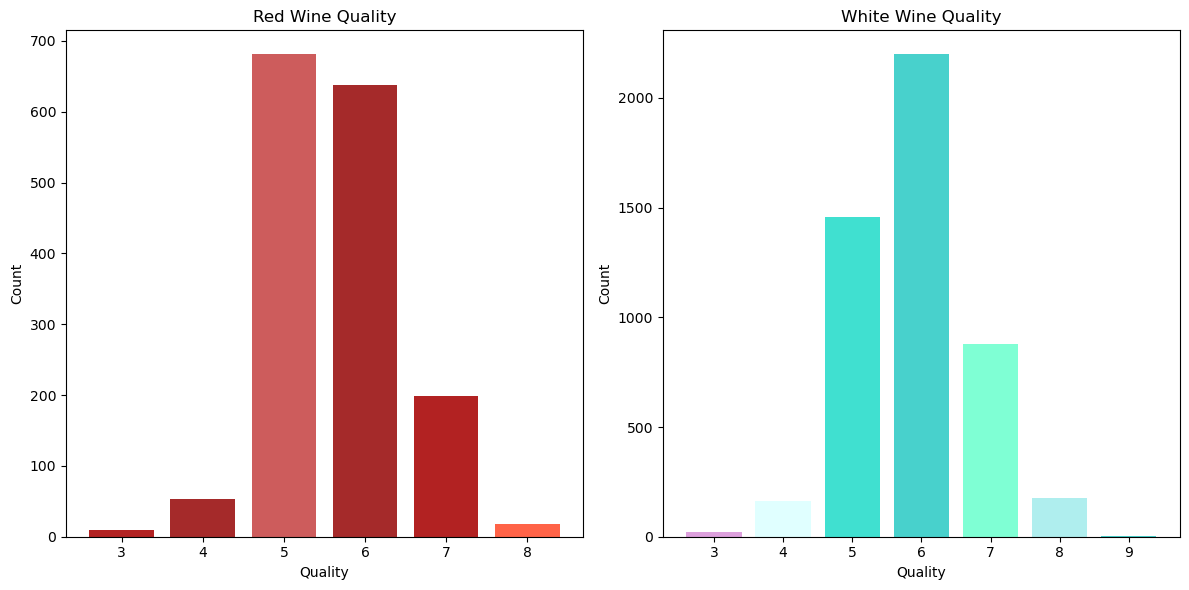

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for red wine quality
axes[0].bar(red_wine['quality'].value_counts().index, red_wine['quality'].value_counts(), color=['indianred','brown','firebrick','brown','tomato','firebrick'])
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')
axes[0].set_title('Red Wine Quality')

# Bar plot for white wine quality
axes[1].bar(white_wine['quality'].value_counts().index, white_wine['quality'].value_counts(), color=['mediumturquoise','turquoise','aquamarine','paleturquoise','lightcyan','plum'])
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Count')
axes[1].set_title('White Wine Quality')

plt.tight_layout()
plt.show()


# Checking data type and for null values

In [26]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [28]:
null_list = list(red_wine.isna().sum())
print(null_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
null_list = list(white_wine.isna().sum())
print(null_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


All the values are in float and integer, which suitable for further analysis. There is no missing values in both dataset.

# Acidic characteristic of both wine

##  pH

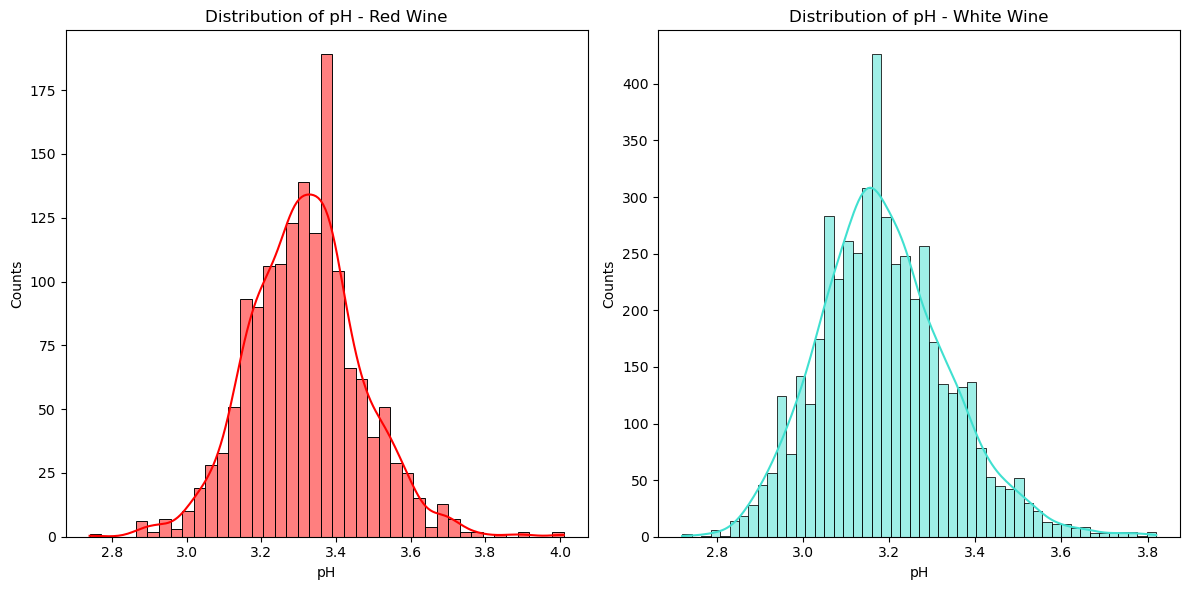

In [89]:
red_wine_pH = red_wine['pH']
white_wine_pH = white_wine['pH']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_pH, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('pH')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of pH - Red Wine')

sns.histplot(white_wine_pH, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('pH')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of pH - White Wine')

plt.tight_layout()
plt.show()

In [43]:
red_wine['pH'].describe()


count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Mean: The mean value of 3.311113 is close to the median value of 3.310000, which suggests that the distribution is approximately symmetric.

In [41]:
white_wine['pH'].describe()

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

Mean: The mean value of 3.188267 is close to the median value of 3.180000, indicating that the distribution is approximately symmetric.

Based on these statistics, the 'pH' distribution appears to be relatively normal. 


### Both pH of Red wine and White wine seems to have normal distribution

## Fixed Acidity

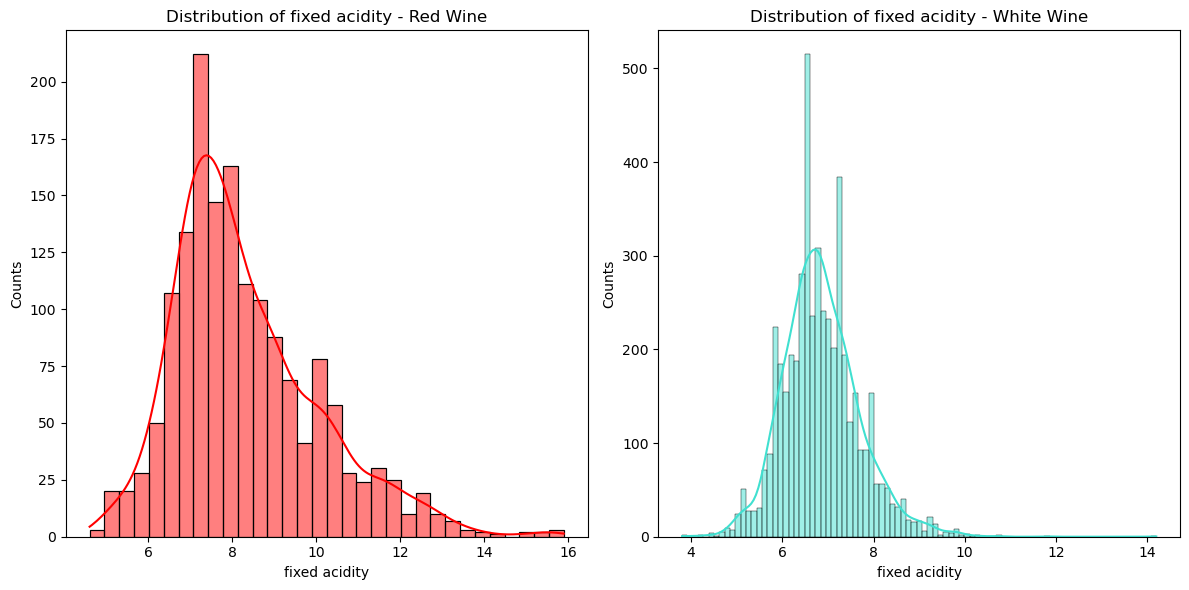

In [97]:
red_wine_FA = red_wine['fixed acidity']
white_wine_FA = white_wine['fixed acidity']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_FA, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('fixed acidity')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of fixed acidity - Red Wine')

sns.histplot(white_wine_FA, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('fixed acidity')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of fixed acidity - White Wine')

plt.tight_layout()
plt.show()

Red wines have right-skewed distribution.

White wines have slight right-skewed distribution

In [98]:
# Calculating the IQR for the 'pH' column in red wine
Q1 = red_wine['fixed acidity'].quantile(0.25)
Q3 = red_wine['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1

# Defining upper bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers in the 'pH' column
outliers = red_wine[(red_wine['fixed acidity'] > upper_bound)]

# Removing outliers from the 'pH' column in red wine
red_wine = red_wine[(red_wine['fixed acidity'] <= upper_bound)]

# Printing the removed outliers
print("Outliers Detected:")
print(outliers['fixed acidity'])

Outliers Detected:
205     12.8
206     12.8
243     15.0
244     15.0
264     12.5
294     13.3
328     13.4
338     12.4
339     12.5
347     13.8
353     13.5
359     12.6
363     12.5
364     12.8
366     12.8
374     14.0
381     13.7
391     13.7
394     12.7
409     12.5
429     12.8
440     12.6
442     15.6
446     12.5
470     13.0
472     12.5
509     13.3
510     12.4
516     12.5
538     12.9
544     14.3
548     12.4
554     15.5
555     15.5
557     15.6
559     13.0
560     12.7
564     13.0
565     12.7
596     12.4
599     12.7
601     13.2
603     13.2
611     13.2
652     15.9
680     13.3
811     12.9
814     12.6
1224    12.6
Name: fixed acidity, dtype: float64


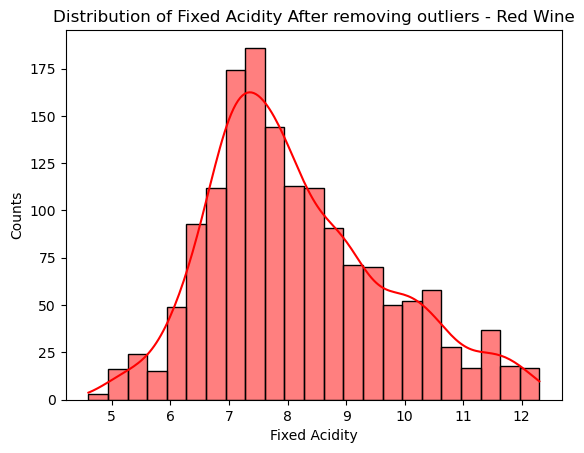

In [99]:
# Creating histogram with KDE for red wine
sns.histplot(red_wine['fixed acidity'],color='red', label='Red Wine', kde=True)

# Setting labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('Counts')
plt.title('Distribution of Fixed Acidity After removing outliers - Red Wine')

# Displaying the plot
plt.show()


In [101]:
Q1 = white_wine['fixed acidity'].quantile(0.25)
Q3 = white_wine['fixed acidity'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5*IQR

outliers = white_wine[white_wine['fixed acidity'] > upper_bound]

white_wine = white_wine[white_wine['fixed acidity'] <= upper_bound]

print("Outliers Detected:")
print(outliers['fixed acidity'])

Outliers Detected:
98       9.8
169      9.8
207     10.2
294      9.1
358     10.0
        ... 
3410     8.9
3414     8.9
3526     8.9
4518     9.0
4522     9.0
Name: fixed acidity, Length: 105, dtype: float64


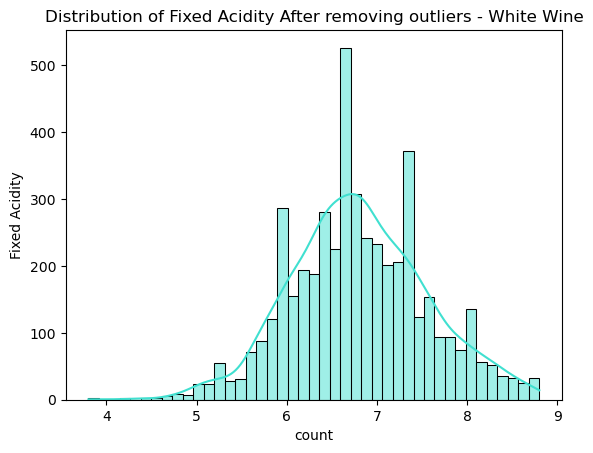

In [103]:
sns.histplot(white_wine['fixed acidity'], color='turquoise', label='White wine', kde=True)

plt.xlabel('count')
plt.ylabel('Fixed Acidity')
plt.title('Distribution of Fixed Acidity After removing outliers - White Wine')

plt.show()
          

## Volatile Acidity

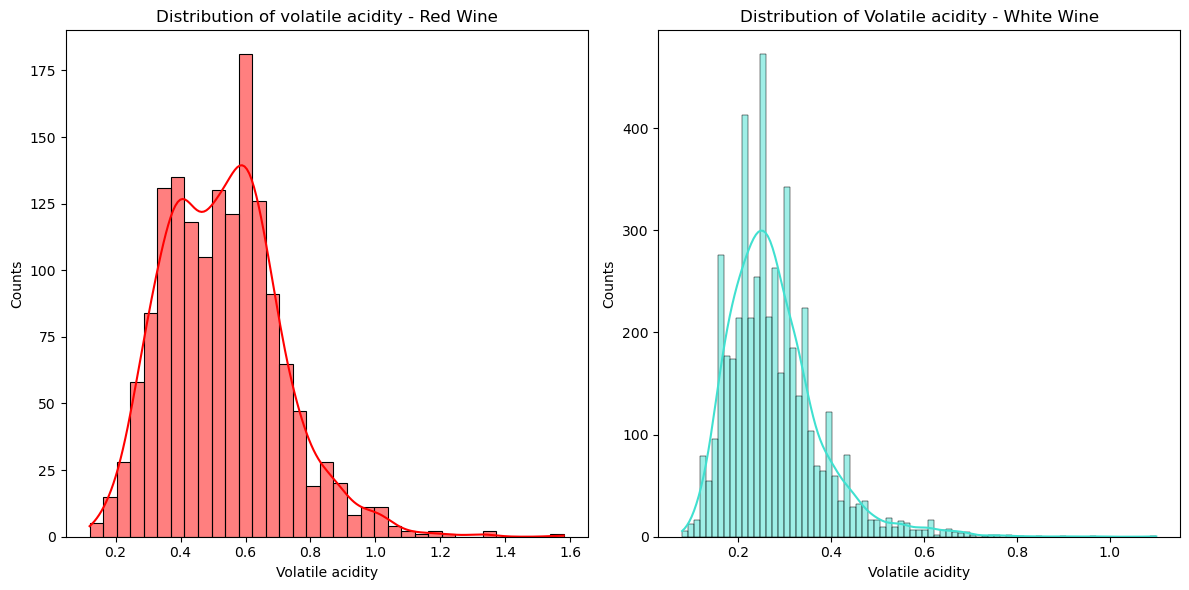

In [104]:
red_wine_VA = red_wine['volatile acidity']
white_wine_VA = white_wine['volatile acidity']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_VA, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('Volatile acidity')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of volatile acidity - Red Wine')

sns.histplot(white_wine_VA, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('Volatile acidity')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of Volatile acidity - White Wine')

plt.tight_layout()
plt.show()

From out data dictionary: High level of volatile acidity can result in an unpleasant vinegar-like aroma and taste.

## Citric Acid

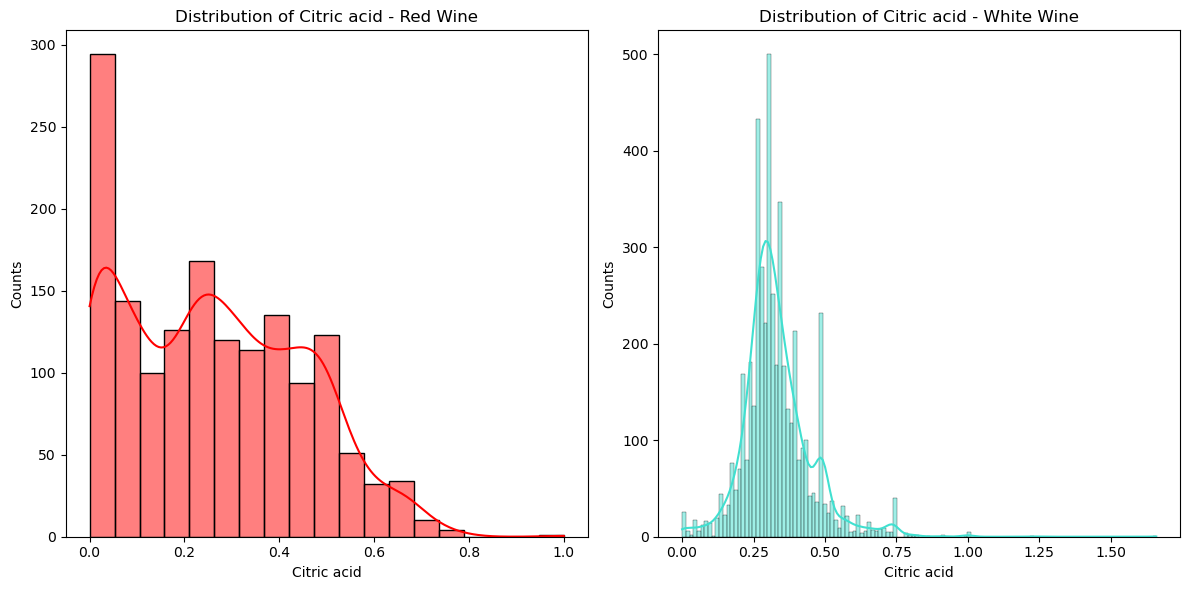

In [107]:
red_wine_CA = red_wine['citric acid']
white_wine_CA = white_wine['citric acid']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_CA, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('Citric acid')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of Citric acid - Red Wine')

sns.histplot(white_wine_CA, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('Citric acid')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of Citric acid - White Wine')

plt.tight_layout()
plt.show()

In [110]:
zero_for_red_wine = (red_wine['citric acid'] == 0).mean() * 100
zero_for_white_wine = (white_wine['citric acid'] == 0).mean()*100

print(f"{zero_for_red_wine:.2f}% Red wines of the dataset have not citric acid")
print(f"{zero_for_white_wine:.2f}% White wines of the dataset have not citric acid")

8.52% Red wines of the dataset have not citric acid
0.40% White wines of the dataset have not citric acid


The presence or absence of citric acid in a wine is not necessarily an indication of a problem with the dataset. The importance of citric acid in wine quality can vary depending on various factors

Citric Acid is used less frequently than tartaric and malic due to the aggressive citric flavors it can add to the wine.

## Quality vs. pH

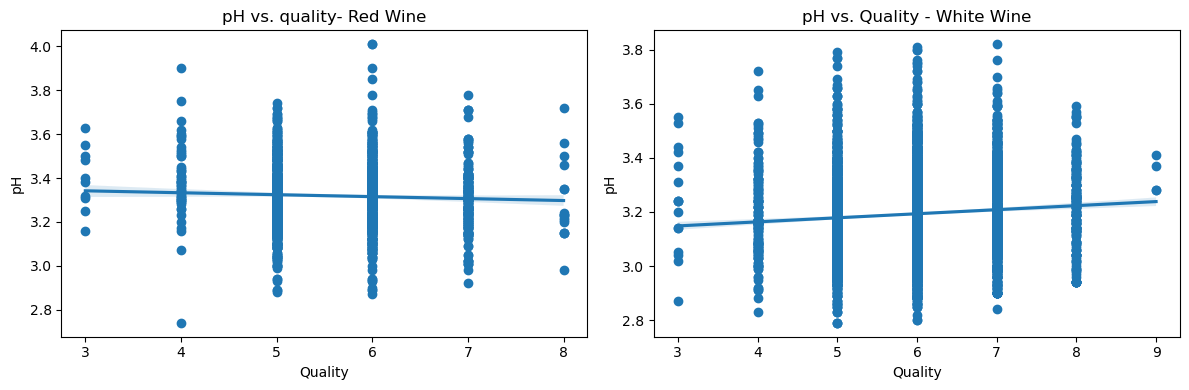

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot of pH vs. quality
axs[0].scatter(red_wine['quality'], red_wine['pH'])
sns.regplot(x=red_wine['quality'], y=red_wine['pH'], scatter=False, ax=axs[0])
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('pH')
axs[0].set_title('pH vs. quality- Red Wine')

# Scatter plot of volatile acidity vs. quality
axs[1].scatter(white_wine['quality'], white_wine['pH'])
sns.regplot(x=white_wine['quality'], y=white_wine['pH'], scatter=False, ax=axs[1])
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('pH')
axs[1].set_title('pH vs. Quality - White Wine')

plt.tight_layout()

plt.show()

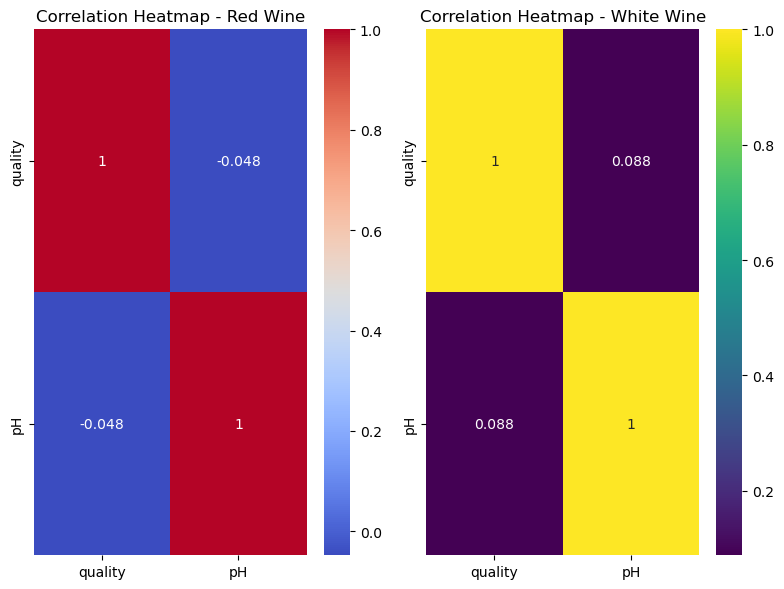

In [131]:
correlation_matrix_rw = red_wine[['quality', 'pH']].corr()
correlation_matrix_ww = white_wine[['quality', 'pH']].corr()

# Create correlation heatmaps
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_rw, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Red Wine')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_ww, annot=True, cmap='viridis')
plt.title('Correlation Heatmap - White Wine')

plt.tight_layout()
plt.show()

In [137]:
# Filter the dataset for the highest-rated wines
White_wine = white_wine[white_wine.quality == white_wine.quality.max()]
Red_wine = red_wine[red_wine.quality == red_wine.quality.max()]

# Determine the range of pH values
pH_range_for_white_wine = (White_wine['pH'].min(), White_wine['pH'].max())
pH_range_for_red_wine = (Red_wine['pH'].min(), Red_wine['pH'].max())

# Print the range of pH values for making the best wine
print("Range of pH for the best white wine:", pH_range_for_white_wine)
print("Range of pH for the best red wine:", pH_range_for_red_wine)

Range of pH for the best white wine: (3.28, 3.41)
Range of pH for the best red wine: (2.98, 3.72)


In the context of red wine,it indicates a negative or inverse relationship between pH and wine quality.A negative relationship means that as the pH value of the wine decreases (becomes more acidic), the quality of the wine tends to increase. In other words, wines with lower pH levels (higher acidity) are associated with higher quality ratings.

In the context of white wine, the correlation coefficient suggests that there is a minimal linear relationship between 'quality' and 'pH'

Overall pH range for both Red wine and White wine suggests that wines are acidic.

According to the sources, "all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH (7 is neutral)." 
Source:https://winefolly.com/deep-dive/understanding-acidity-in-wine/

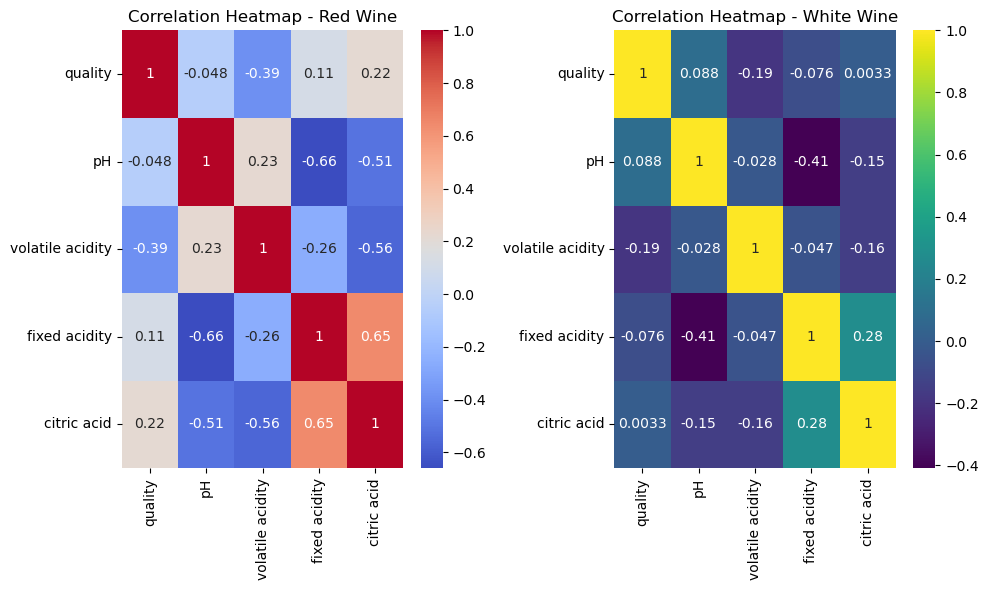

In [142]:
correlation_matrix_rw = red_wine[['quality', 'pH', 'volatile acidity', 'fixed acidity','citric acid' ]].corr()
correlation_matrix_ww = white_wine[['quality', 'pH','volatile acidity','fixed acidity','citric acid']].corr()

# Create correlation heatmaps
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_rw, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Red Wine')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_ww, annot=True, cmap='viridis')
plt.title('Correlation Heatmap - White Wine')

plt.tight_layout()
plt.show()

### For Red wine:

* quality and volatile acidity: The moderate negative correlation (-0.390558) indicates that wines with lower volatile acidity (lower levels of acetic acid) tend to have higher quality ratings.

* quality' and 'fixed acidity: The weak positive correlation (0.124052) suggests that wines with higher fixed acidity tend to have slightly higher quality ratings. 

* quality and citric acid: The correlation coefficient between quality and citric acid is 0.226373, indicating a weak positive correlation. This suggests that there is a slight tendency for wines with higher citric acid content to have slightly higher quality ratings

### For White Wine:

* quality and volatile acidity:Indicates a weak negative correlation. This suggests that as the 'volatile acidity' increases, the 'quality' of white wine tends to decrease, although the correlation is not very strong.

* quality and fixed acidity: Indicates a very weak negative correlation. This suggests that there is a minimal linear relationship between 'quality' and 'fixed acidity' in white wine.

* quality and citric acid: Indicates a very weak positive correlation. This suggests that there is almost no linear relationship between 'quality' and 'citric acid' in white wine.


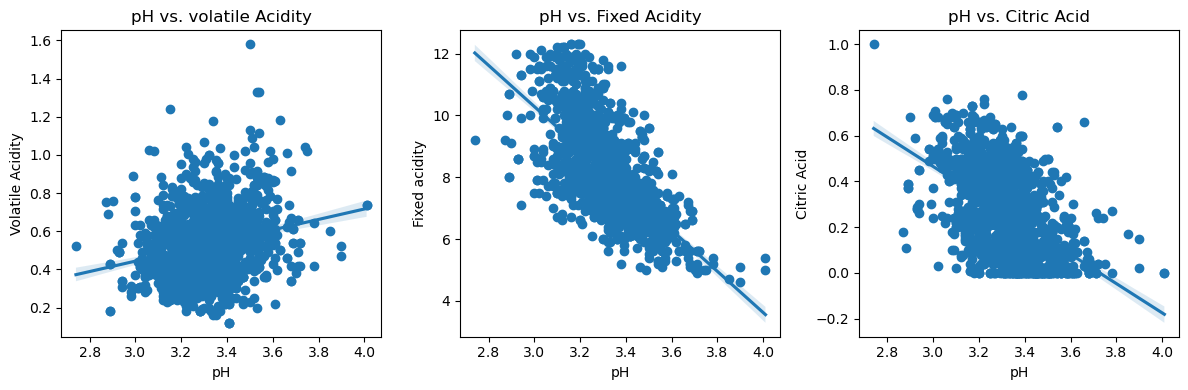

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Scatter plot of pH vs. quality
axs[0].scatter(red_wine['pH'], red_wine['volatile acidity'])
sns.regplot(x=red_wine['pH'], y=red_wine['volatile acidity'], scatter=False, ax=axs[0])
axs[0].set_xlabel('pH')
axs[0].set_ylabel('Volatile Acidity')
axs[0].set_title('pH vs. volatile Acidity')

# Scatter plot of volatile acidity vs. quality
axs[1].scatter(red_wine['pH'], red_wine['fixed acidity'])
sns.regplot(x=red_wine['pH'], y=red_wine['fixed acidity'], scatter=False, ax=axs[1])
axs[1].set_xlabel('pH')
axs[1].set_ylabel('Fixed acidity')
axs[1].set_title('pH vs. Fixed Acidity')

# Scatter plot of citric acid vs. quality
axs[2].scatter(red_wine['pH'], red_wine['citric acid'])
sns.regplot(x=red_wine['pH'], y=red_wine['citric acid'], scatter=False, ax=axs[2])
axs[2].set_xlabel('pH')
axs[2].set_ylabel('Citric Acid')
axs[2].set_title('pH vs. Citric Acid')


plt.tight_layout()

plt.show()

### For Red Wine:

* The correlations indicate that pH is negatively correlated with fixed acidity and citric acid, suggesting that wines with higher fixed acidity tend to have lower pH values and lower levels of citric acid. Additionally, there is a weak positive correlation between pH and volatile acidity, indicating a slight tendency for wines with higher pH values to have slightly higher levels of volatile acidity.

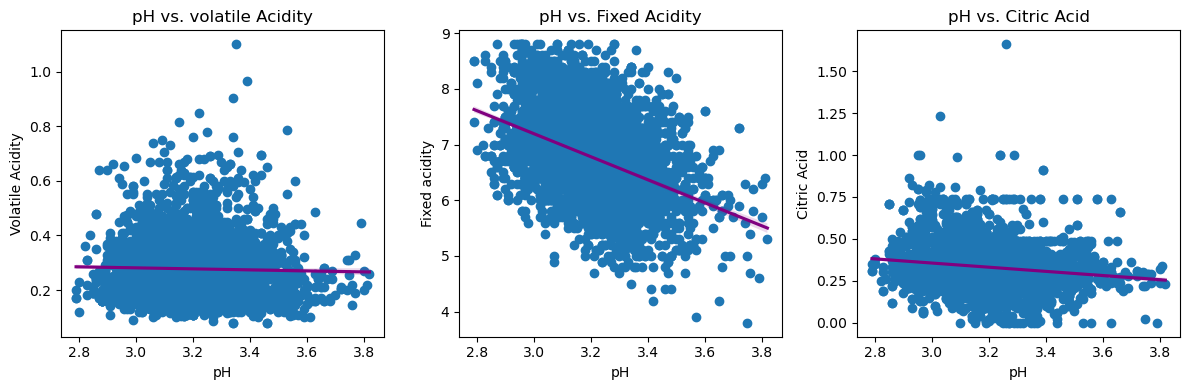

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Scatter plot of pH vs. quality
axs[0].scatter(white_wine['pH'], white_wine['volatile acidity'])
sns.regplot(x=white_wine['pH'], y=white_wine['volatile acidity'], color = 'purple', scatter=False, ax=axs[0])
axs[0].set_xlabel('pH')
axs[0].set_ylabel('Volatile Acidity')
axs[0].set_title('pH vs. volatile Acidity')

# Scatter plot of volatile acidity vs. quality
axs[1].scatter(white_wine['pH'], white_wine['fixed acidity'])
sns.regplot(x=white_wine['pH'], y=white_wine['fixed acidity'],color='purple', scatter=False, ax=axs[1])
axs[1].set_xlabel('pH')
axs[1].set_ylabel('Fixed acidity')
axs[1].set_title('pH vs. Fixed Acidity')

# Scatter plot of citric acid vs. quality
axs[2].scatter(white_wine['pH'], white_wine['citric acid'])
sns.regplot(x=white_wine['pH'], y=white_wine['citric acid'], color='purple', scatter=False, ax=axs[2])
axs[2].set_xlabel('pH')
axs[2].set_ylabel('Citric Acid')
axs[2].set_title('pH vs. Citric Acid')

plt.tight_layout()

plt.show()

### For White Wine:

* 'pH' and 'volatile acidity': Indicates a very weak negative correlation. There is a minimal linear relationship between 'pH' and 'volatile acidity' in white wine.

* 'pH' and 'fixed acidity':Indicates a weak negative correlation. As 'fixed acidity' increases, 'pH' tends to decrease in white wine.

* 'pH' and 'citric acid':Indicates a weak negative correlation. There is a slight tendency for 'pH' to decrease as the 'citric acid' content increases in white wine.

##### In summary, while acidity, as measured by pH, has a minor influence on the quality ratings of wines, the dataset analysis supports the notion that wines are acidic. The pH range observed for wines with better quality ratings further emphasizes their acidic nature.

## Alcohol

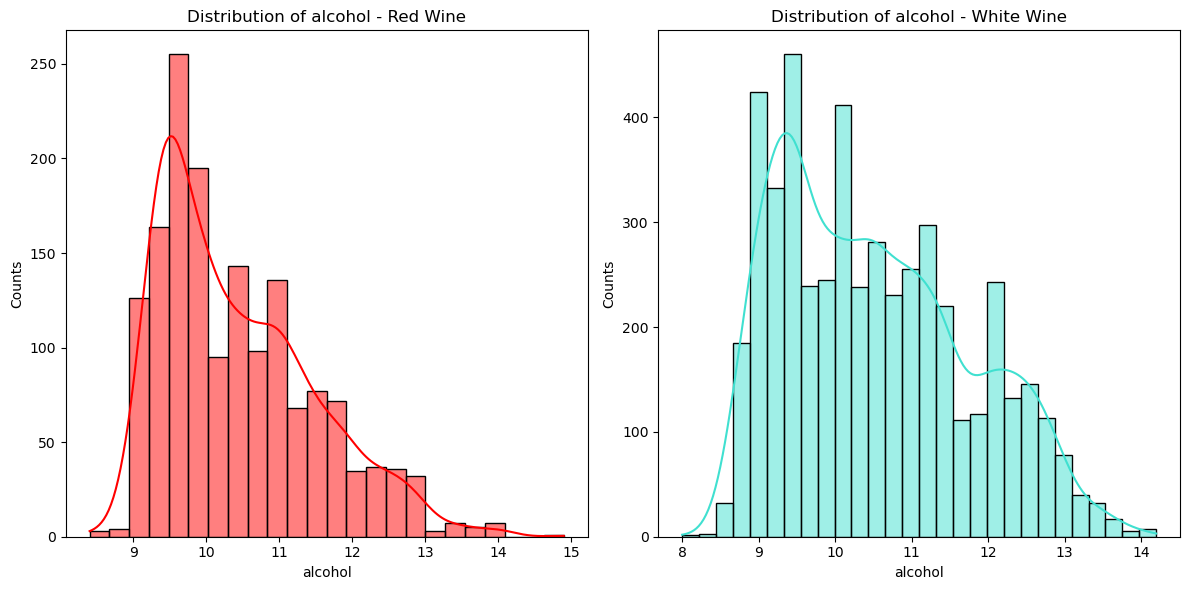

In [47]:
red_wine_pH = red_wine['alcohol']
white_wine_pH = white_wine['alcohol']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_pH, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('alcohol')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of alcohol - Red Wine')

sns.histplot(white_wine_pH, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('alcohol')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of alcohol - White Wine')

plt.tight_layout()
plt.show()

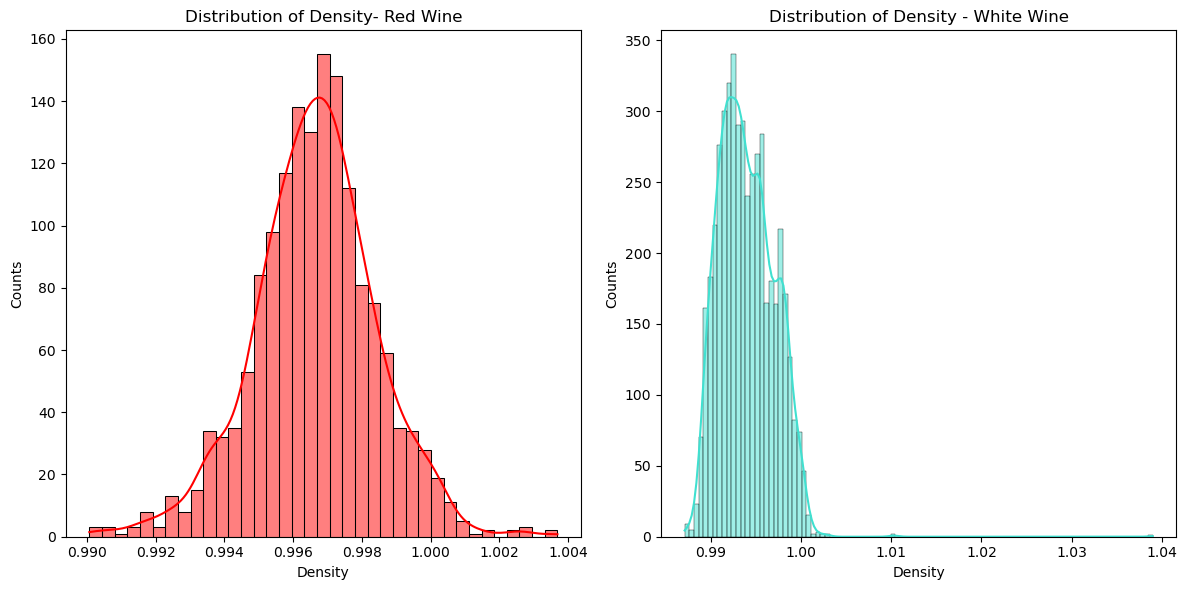

In [149]:
red_wine_pH = red_wine['density']
white_wine_pH = white_wine['density']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(red_wine_pH, ax=axes[0], color='red', label='Red Wine', kde=True)
axes[0].set_xlabel('Density')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of Density- Red Wine')

sns.histplot(white_wine_pH, ax=axes[1], color='turquoise', label='White Wine', kde=True)
axes[1].set_xlabel('Density')
axes[1].set_ylabel('Counts')
axes[1].set_title('Distribution of Density - White Wine')

plt.tight_layout()
plt.show()

In [150]:
Q1 = white_wine['density'].quantile(0.25)
Q3 = white_wine['density'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5*IQR

outliers = white_wine[white_wine['density'] > upper_bound]

white_wine = white_wine[white_wine['density'] <= upper_bound]

print("Outliers Detected:")
print(outliers['density'])

Outliers Detected:
1653    1.01030
1663    1.01030
2781    1.03898
3619    1.00295
3623    1.00295
Name: density, dtype: float64


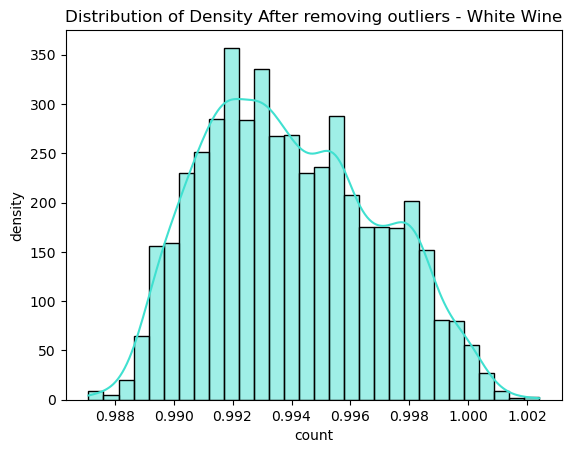

In [151]:
sns.histplot(white_wine['density'], color='turquoise', label='White wine', kde=True)

plt.xlabel('count')
plt.ylabel('density')
plt.title('Distribution of Density After removing outliers - White Wine')

plt.show()
          

## Density vs. Alcohol

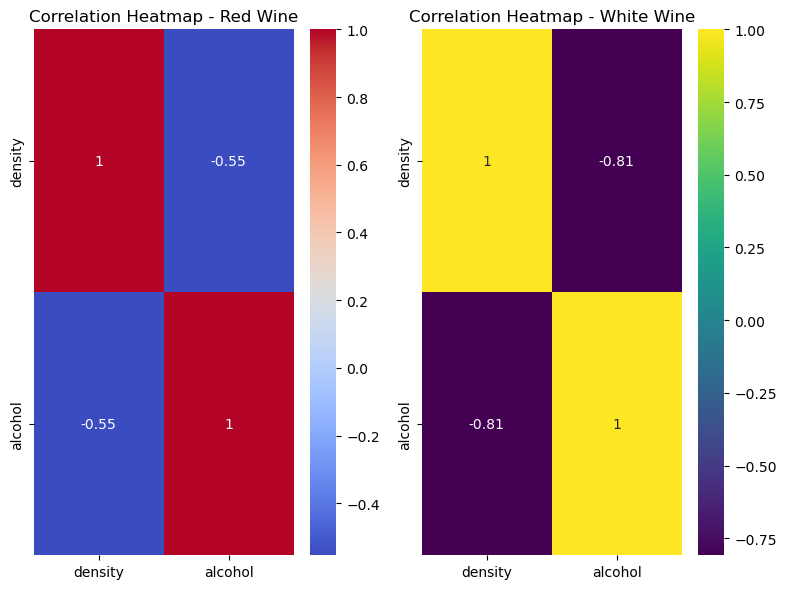

In [152]:
correlation_matrix_rw = red_wine[['density', 'alcohol']].corr()
correlation_matrix_ww = white_wine[['density', 'alcohol']].corr()

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_rw, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Red Wine')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_ww, annot=True, cmap='viridis')
plt.title('Correlation Heatmap - White Wine')

plt.tight_layout()
plt.show()

### For both Red Wine and White Wine:

There is a strong negative correlation. And it suggests a significant inverse relationship between 'density' and 'alcohol' in the wines. As the alcohol content increases, the density of the wines tend to decrease, and vice versa.

# Alcohol vs. Quality

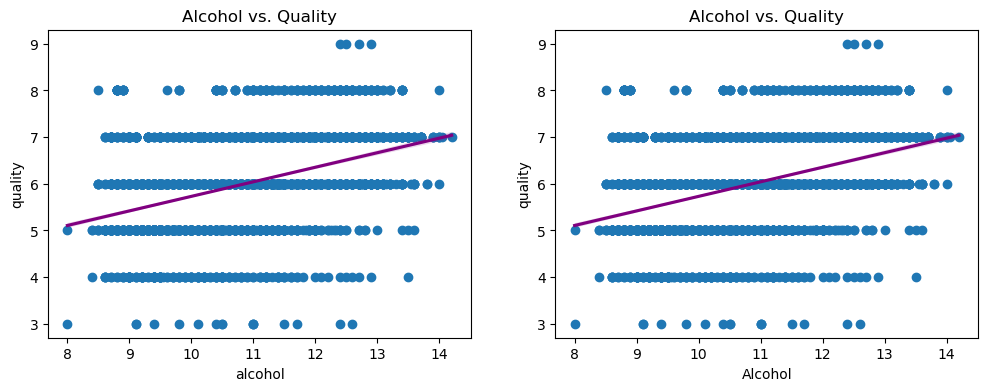

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot of pH vs. quality
axs[0].scatter(white_wine['alcohol'], white_wine['quality'])
sns.regplot(x=white_wine['alcohol'], y=white_wine['quality'], color = 'purple', scatter=False, ax=axs[0])
axs[0].set_xlabel('alcohol')
axs[0].set_ylabel('quality')
axs[0].set_title('Alcohol vs. Quality')

# Scatter plot of volatile acidity vs. quality
axs[1].scatter(white_wine['alcohol'], white_wine['quality'])
sns.regplot(x=white_wine['alcohol'], y=white_wine['quality'],color='purple', scatter=False, ax=axs[1])
axs[1].set_xlabel('Alcohol')
axs[1].set_ylabel('quality')
axs[1].set_title('Alcohol vs. Quality')

plt.show()

##### There is positive linear relation between quality of wine and alcohol. Wines with higher alcohol have higher quality ratings.

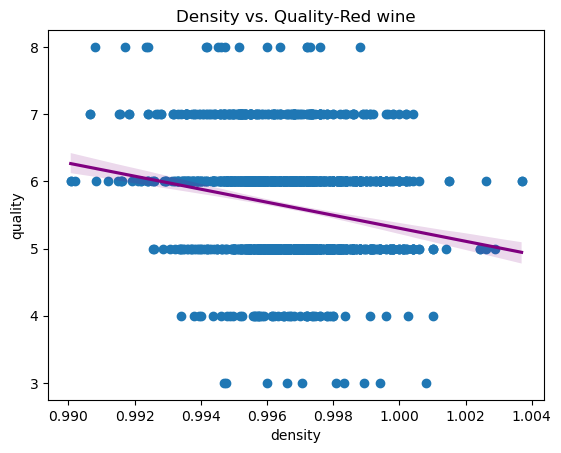

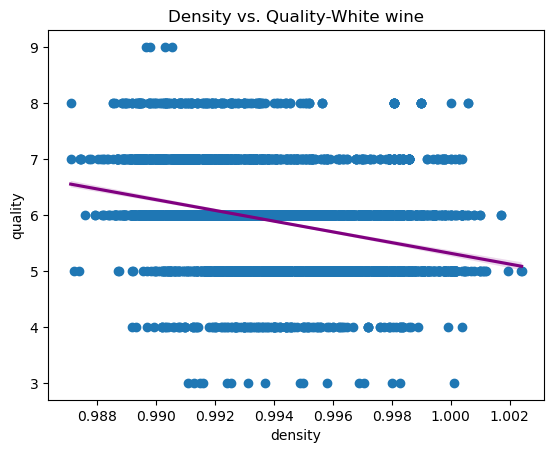

In [167]:
def create_scatter_with_regression(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    sns.regplot(x=x, y=y, color='purple', scatter=False, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

create_scatter_with_regression(red_wine['density'], red_wine['quality'], 'density', 'quality', 'Density vs. Quality-Red wine')
create_scatter_with_regression(white_wine['density'], white_wine['quality'], 'density', 'quality', 'Density vs. Quality-White wine')


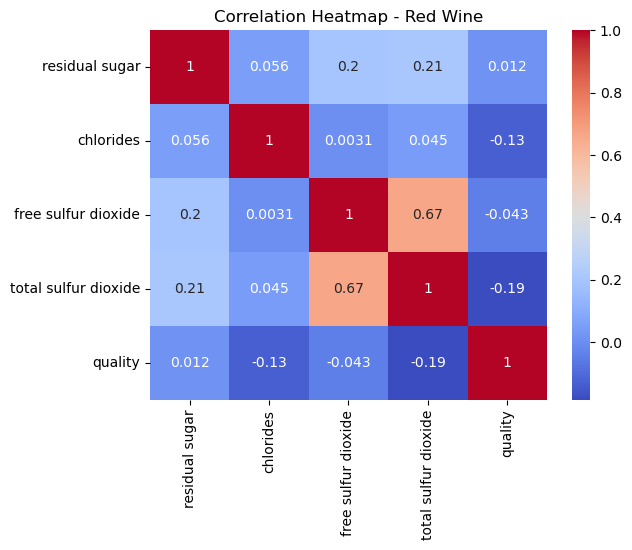

In [175]:
correlation_matrix_rw = red_wine[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'quality']].corr()
sns.heatmap(correlation_matrix_rw, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Red Wine')

plt.show()

* 'quality' and 'residual sugar': The correlation coefficient is 0.011631, indicating a very weak positive correlation. There is almost no linear relationship between 'quality' and 'residual sugar'.

* 'quality' and 'chlorides': The correlation coefficient is -0.130590, indicating a weak negative correlation. As the 'chlorides' content increases, 'quality' tends to slightly decrease.

* 'quality' and 'free sulfur dioxide': The correlation coefficient is -0.042865, indicating a weak negative correlation. There is a slight tendency for 'quality' to decrease as the 'free sulfur dioxide' content increases.

* 'quality' and 'total sulfur dioxide': The correlation coefficient is -0.185146, indicating a weak negative correlation. There is a slight tendency for 'quality' to decrease as the 'total sulfur dioxide' content increases.

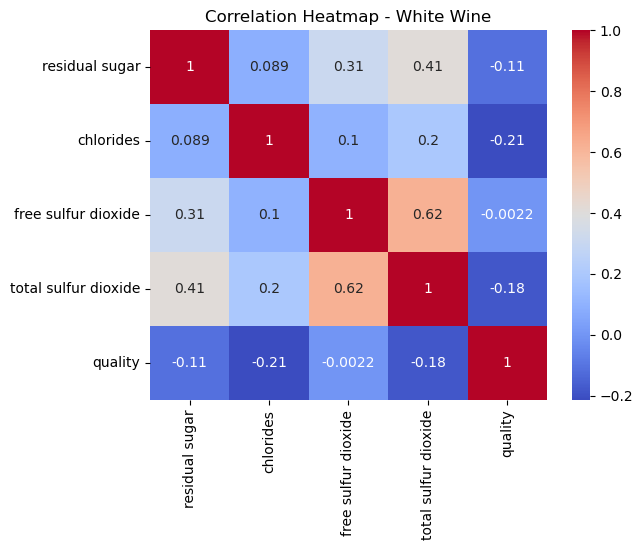

In [178]:
correlation_matrix_ww = white_wine[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'quality']].corr()
sns.heatmap(correlation_matrix_ww, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - White Wine')

plt.show()

In [179]:
correlation_matrix_ww

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
residual sugar,1.000000,0.088959,0.309142,0.412114,-0.109802
chlorides,0.088959,1.000000,0.101126,0.198631,-0.213684
free sulfur dioxide,0.309142,0.101126,1.000000,0.618144,-0.002192
total sulfur dioxide,0.412114,0.198631,0.618144,1.000000,-0.180510
quality,-0.109802,-0.213684,-0.002192,-0.180510,1.000000


* 'quality' and 'residual sugar': The correlation coefficient is -0.109802, indicating a weak negative correlation. As the 'residual sugar' content increases, there is a slight tendency for 'quality' to decrease.

* 'quality' and 'chlorides': The correlation coefficient is -0.213684, indicating a weak negative correlation. Higher levels of 'chlorides' are associated with lower 'quality' ratings.

* 'quality' and 'free sulfur dioxide': The correlation coefficient is -0.002192, suggesting a very weak correlation. There is almost no linear relationship between 'quality' and 'free sulfur dioxide'.

* 'quality' and 'total sulfur dioxide': The correlation coefficient is -0.180510, indicating a weak negative correlation. As the 'total sulfur dioxide' content increases, 'quality' tends to decrease slightly.

#### Overall, the correlations between 'quality' and these variables are generally weak. It implies that these variables alone not strongly determine the 'quality' of the wine

# Result of Analysis

The main aim of my analysis was to examine the physicochemical data of wines and identify which specific features have a significant impact on determining the quality of wine.

Great wines are in balance with their 4 fundamental traits (Acidity, tannin, alcohol, and sweetness).

Through the analysis, it became evident that the acidity levels of wines play a crucial role in the quality ratings. Winemakers generally prefer a pH range of 3.0 to 3.5 for producing wines of higher quality. This indicates that the acidic content of wines is an important factor in determining their overall quality.

Additionally, the alcohol content of wines emerged as another significant property. Wines with higher alcohol content tend to be less dense and are often associated with better quality. This suggests that wines with lower density are generally considered to be of higher quality.

Furthermore, when specifically considering red wine, there was a very weak positive correlation between 'quality' and 'residual sugar'. This implies that there is little to no linear relationship between these two variables in red wine. On the other hand, in white wine, there was a weak negative correlation between 'quality' and 'residual sugar', indicating that as the 'residual sugar' content increases, the 'quality' rating of white wine tends to slightly decrease.

In conclusion, the quality of wine is determined by the complex interplay of various factors. It is challenging to pinpoint any one or two specific variables as definitive indicators of wine quality. Instead, the overall quality relies on the intricate combination of multiple elements.